In [72]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import seaborn as sns
import copy

from load_data import load_expression
from scipy.stats import pearsonr

from model import SpiceMix
from Result import SpiceMixResult

In [73]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: flex;
    justify-content: center;
}
</style>
""")

In [74]:
import h5py

In [75]:
with h5py.File("../../SeqFISHPlus/previous_runs/new_format/SpiceMix_K20_random_seed_0.hdf5", 'r') as h5file:
    print(h5file["weights"]["0"].keys())

<KeysViewHDF5 ['0', '10', '100', '110', '120', '130', '140', '150', '160', '170', '180', '190', '20', '200', '210', '220', '230', '240', '250', '260', '270', '280', '290', '30', '300', '310', '320', '330', '340', '350', '360', '370', '380', '390', '40', '400', '410', '420', '430', '440', '450', '460', '470', '480', '490', '50', '500', '60', '70', '80', '90']>


In [90]:
STARmap_spatial_result = SpiceMixResult(
    path2dataset='../../SeqFISHPlus/',
    result_filename="../../SeqFISHPlus/previous_runs/new_format/SpiceMix_K20_random_seed_0.hdf5",
    neighbor_suffix="",
)

STARmap_nmf_result = SpiceMixResult(
    path2dataset='../../SeqFISHPlus',
    result_filename="../../SeqFISHPlus/previous_runs/new_format/NMF_K20_random_seed_0.hdf5",
    neighbor_suffix="",
)

Result file = ../../SeqFISHPlus/previous_runs/new_format/SpiceMix_K20_random_seed_0.hdf5
{'K': 20, 'betas': array([0.2, 0.2, 0.2, 0.2, 0.2]), 'lambda_sigma_x_inverse': 0.0001, 'prior_x_modes': {'0': b'Exponential shared fixed', '1': b'Exponential shared fixed', '2': b'Exponential shared fixed', '3': b'Exponential shared fixed', '4': b'Exponential shared fixed'}}


/work/magroup/shahula/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:112: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


0
0
1
1
2
2
3
3
4
4
Result file = ../../SeqFISHPlus/previous_runs/new_format/NMF_K20_random_seed_0.hdf5
{'K': 20, 'betas': array([0.2, 0.2, 0.2, 0.2, 0.2]), 'lambda_sigma_x_inverse': 0.0001, 'prior_x_modes': {'0': b'Exponential shared fixed', '1': b'Exponential shared fixed', '2': b'Exponential shared fixed', '3': b'Exponential shared fixed', '4': b'Exponential shared fixed'}}
0
0
1
1
2
2
3
3
4
4


Found 500 iterations from ../../SeqFISHPlus/previous_runs/new_format/SpiceMix_K20_random_seed_0.hdf5
Found 500 iterations from ../../SeqFISHPlus/previous_runs/new_format/NMF_K20_random_seed_0.hdf5


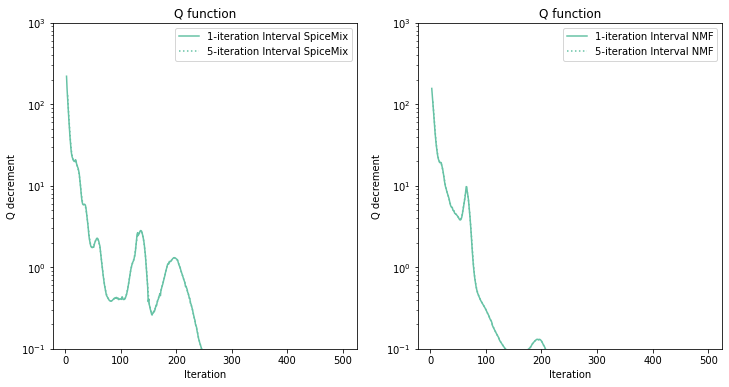

In [91]:
# Prior to downstream analysis, we should make sure the models have converged
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
STARmap_spatial_result.plot_convergence(axes[0], label='SpiceMix', c='C0')
STARmap_nmf_result.plot_convergence(axes[1], label='NMF', c='C0')
for ax in axes.flat:
    ax.set_title('Q function')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Q decrement')
    ax.set_yscale('log')
    ax.set_ylim(10**-1, 10**3)
    ax.legend()

In [92]:
# Load latent states for all cells estimated by the last iteration of SpiceMix/NMF
STARmap_spatial_result.load_latent_states(iiter=-1)
STARmap_nmf_result.load_latent_states(iiter=-1)

Iteration -1
Iteration -1


/work/magroup/shahula/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:112: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


optimal K = 32
#clusters = 32, #-1 = 0
optimal K = 24
#clusters = 24, #-1 = 0


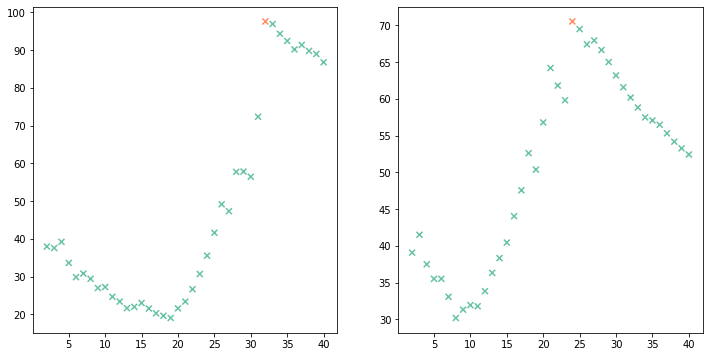

In [93]:
# Do hierarchical clustering on ALL cells in the latent space
# TODO: accelerate this function for datasets of 10k+ cells 
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
STARmap_spatial_result.determine_optimal_clusters(axes[0], K_range=np.arange(2, 41))
STARmap_nmf_result.determine_optimal_clusters(axes[1], K_range=np.arange(2, 41))

In [94]:
STARmap_spatial_result.determine_clusters(16)
STARmap_nmf_result.determine_clusters(16)

array([ 7,  7,  7,  3,  7,  3,  7,  3,  7,  7,  7,  7,  8,  7,  7,  3,  7,
        7,  8, 15,  7,  3,  4,  3,  7,  0,  7,  7,  7,  7,  7,  7,  7,  7,
       11,  3,  8,  0,  0, 13,  3,  8,  8,  4,  8,  0,  3,  0,  3,  0, 11,
        7,  7,  7,  7,  7,  7,  7,  7,  3,  7,  3,  7,  7,  7,  8,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  0,  7,  7,  7,  7,  7, 12,  7,
        3,  0,  7,  7,  7,  7,  7,  7,  3,  7,  7,  7,  7,  7,  8,  7,  7,
        7,  7,  0,  0,  3,  7,  7,  3,  7,  7,  7,  3,  7,  0,  4,  8,  9,
        9,  9,  9,  9,  0,  9,  4,  9,  9,  9,  9,  9,  9,  9,  9,  1,  9,
        8,  9,  9,  1,  9,  9,  9,  9,  9,  9,  3,  9,  9,  9,  3,  9,  9,
        9,  4,  4,  9,  9,  9,  8,  9,  9,  9,  9,  9,  9,  9,  4,  9,  9,
        8,  9,  9,  9,  9,  9,  3,  4,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  8,  9,  9,  9,  9,  4,  3,  9,  9,  8,  9,  3,
        9,  4,  9,  9,  9,  9,  9,  9,  4,  9,  9,  1,  9,  9,  9,  3,  4,
        9,  9,  1,  9,  9

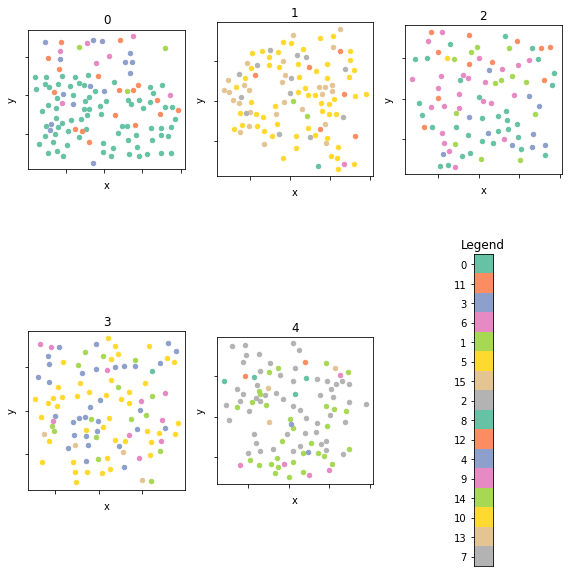

In [95]:
plot_height = int(np.sqrt(STARmap_spatial_result.num_repli))
plot_width = STARmap_spatial_result.num_repli // plot_height

if plot_height * plot_width < STARmap_spatial_result.num_repli + 1:
    plot_width += 1

fig, axes = plt.subplots(plot_height, plot_width, figsize=(plot_height * 4, plot_width * 3), squeeze=False)
STARmap_spatial_result.plot_multireplicate(axes, "cluster")

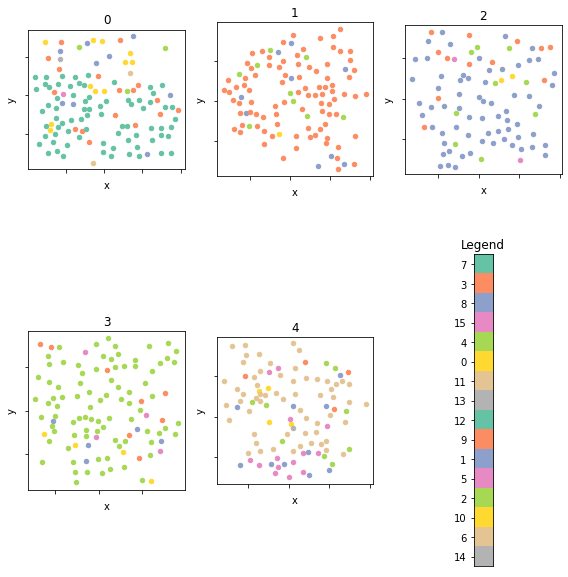

In [96]:
plot_height = int(np.sqrt(STARmap_nmf_result.num_repli))
plot_width = STARmap_nmf_result.num_repli // plot_height

if plot_height * plot_width < STARmap_nmf_result.num_repli + 1:
    plot_width += 1

fig, axes = plt.subplots(plot_height, plot_width, figsize=(plot_height * 4, plot_width * 3), squeeze=False)
STARmap_nmf_result.plot_multireplicate(axes, "cluster")

In [97]:
replicate = 0
replicate_string = str(replicate)

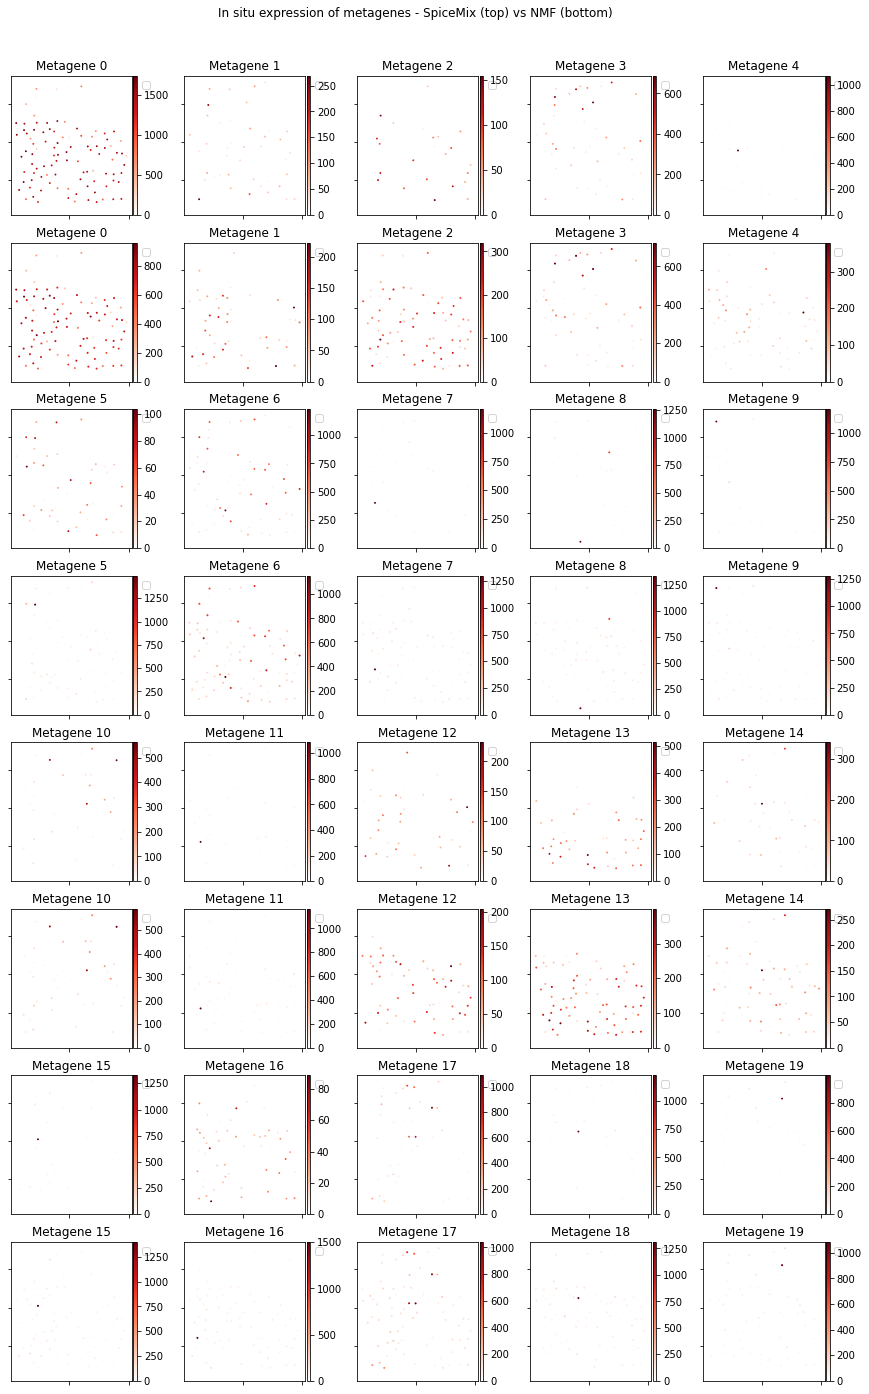

In [98]:
# We ovrlap latent states on the spatial space
# SpiceMix metagenes are expected to show clearer spatial patterns with less background expressions
segmentdata = copy.deepcopy(plt.get_cmap('Reds')._segmentdata)
segmentdata['red'  ][0] = (0., 1., 1.)
segmentdata['green'][0] = (0., 1., 1.)
segmentdata['blue' ][0] = (0., 1., 1.)
cmap = LinearSegmentedColormap('', segmentdata=segmentdata, N=256)

plot_height = 8
plot_width = 5
fig, axes = plt.subplots(plot_height, plot_width, figsize=(plot_width * 3, plot_height * 3))
fig.suptitle('In situ expression of metagenes - SpiceMix (top) vs NMF (bottom)', y=.92)
STARmap_spatial_result.plot_metagenes(axes[[0, 2, 4, 6]], cmap=cmap, replicate=replicate, s=0.8)
STARmap_nmf_result.plot_metagenes(axes[[1, 3, 5, 7]], s=1, cmap=cmap, replicate=replicate)
plt.show()

In [99]:
# do dimensionality reduction by UMAP
kwargs=dict(
    n_components=2,
    n_neighbors=30,
    min_dist=0.2,
    random_state=0,
)
STARmap_spatial_result.UMAP(**kwargs)
STARmap_nmf_result.UMAP(**kwargs)

Text(0.5, 1.0, 'Replicates')

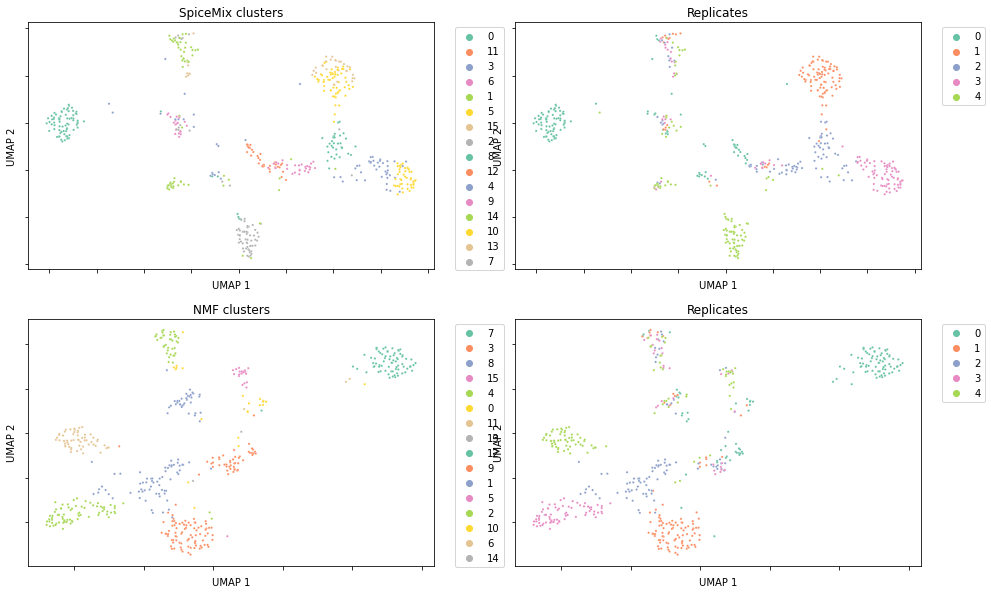

In [100]:
# Visualize cells in the latent space colored by
#   SpiceMix/NMF clusters (cluster)
#   cell types from the original analysis (cell type)
#   replicates (repli)
# Result.visualizeFeaturesSpace is a wraper of Result.visualizeFeatureSpace and handles the custom order of metagenes
kwargs = dict(s=5)
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
STARmap_spatial_result.plot_feature(axes[0, 0], 'cluster', key_x='UMAP 1', key_y='UMAP 2', **kwargs)
STARmap_spatial_result.plot_feature(axes[0, 1], 'replicate', key_x='UMAP 1', key_y='UMAP 2', **kwargs)

STARmap_nmf_result.plot_feature(axes[1, 0], 'cluster', key_x='UMAP 1', key_y='UMAP 2', **kwargs)
STARmap_nmf_result.plot_feature(axes[1, 1], 'replicate', key_x='UMAP 1', key_y='UMAP 2', **kwargs)

axes[0, 0].set_title('SpiceMix clusters')
axes[0, 1].set_title('Replicates')
axes[1, 0].set_title('NMF clusters')
axes[1, 1].set_title('Replicates')

In [101]:
adjacency_lists = STARmap_spatial_result.dataset["Es"][replicate]
num_metagenes = STARmap_spatial_result.hyperparameters["K"]

empirical_spicemix_affinities = np.zeros((num_metagenes, num_metagenes))
embeddings = STARmap_spatial_result.data[STARmap_spatial_result.weight_columns].values
embeddings /= embeddings.sum(axis=1, keepdims=True)

print(embeddings)

empirical_matches = [[[] for _ in range(num_metagenes)] for _ in range(num_metagenes)]
for cell, adjacency_list in adjacency_lists.items():
    cell = int(cell)
    cell_embedding = embeddings[cell]
    # average_adjacent_embedding = embeddings[adjacency_list].mean(axis=0)
    for adjacent_cell in adjacency_list:
        adjacent_embedding = embeddings[adjacent_cell]
        for first_metagene in range(num_metagenes):
            for second_metagene in range(first_metagene, num_metagenes):
                match = cell_embedding[first_metagene], adjacent_embedding[second_metagene]
                empirical_matches[first_metagene][second_metagene].append(match)

for first_metagene in range(num_metagenes):
    for second_metagene in range(first_metagene, num_metagenes):
        x, y = np.array(empirical_matches[first_metagene][second_metagene]).T
        empirical_spicemix_affinities[first_metagene][second_metagene], _ = pearsonr(x, y)
        
empirical_spicemix_affinities += empirical_spicemix_affinities.T - np.diag(np.diag(empirical_spicemix_affinities))

[[7.72381861e-01 1.62143650e-02 5.48035858e-10 ... 3.40305723e-11
  2.21497299e-11 5.98123366e-10]
 [6.26457471e-01 6.70631814e-12 3.12542806e-11 ... 2.90737410e-02
  1.70894446e-02 1.05871734e-02]
 [8.30586795e-01 2.47815507e-02 4.99066296e-02 ... 6.31964880e-12
  1.30867040e-02 7.94821065e-13]
 ...
 [1.33900510e-10 2.11522063e-01 5.37435227e-01 ... 7.58082923e-11
  5.39922428e-10 9.71812041e-04]
 [4.03320864e-10 1.77280374e-01 5.84648681e-01 ... 4.62988282e-08
  5.17299451e-03 6.10953427e-03]
 [8.08130697e-03 1.65834474e-01 6.31163623e-01 ... 1.05628846e-02
  1.45232885e-02 1.05630029e-02]]


In [102]:
adjacency_lists = STARmap_spatial_result.dataset["Es"][replicate]
num_metagenes = STARmap_spatial_result.hyperparameters["K"]

empirical_nmf_affinities = np.zeros((num_metagenes, num_metagenes))
embeddings = STARmap_nmf_result.data[STARmap_nmf_result.weight_columns].values
embeddings /= embeddings.sum(axis=1, keepdims=True)

empirical_matches = [[[] for _ in range(num_metagenes)] for _ in range(num_metagenes)]
for cell, adjacency_list in adjacency_lists.items():
    cell = int(cell)
    cell_embedding = embeddings[cell]
    # average_adjacent_embedding = embeddings[adjacency_list].mean(axis=0)
    for adjacent_cell in adjacency_list:
        adjacent_embedding = embeddings[adjacent_cell]
        for first_metagene in range(num_metagenes):
            for second_metagene in range(first_metagene, num_metagenes):
                match = cell_embedding[first_metagene], adjacent_embedding[second_metagene]
                empirical_matches[first_metagene][second_metagene].append(match)

for first_metagene in range(num_metagenes):
    for second_metagene in range(first_metagene, num_metagenes):
        x, y = np.array(empirical_matches[first_metagene][second_metagene]).T
        empirical_nmf_affinities[first_metagene][second_metagene], _ = pearsonr(x, y)
        
empirical_nmf_affinities += empirical_nmf_affinities.T - np.diag(np.diag(empirical_nmf_affinities))

Text(0.5, 1.0, 'NMF Empirical Metagene Correlation')

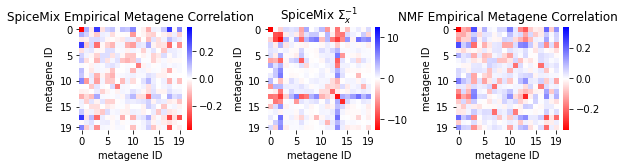

In [103]:
segmentdata = copy.deepcopy(plt.get_cmap('bwr')._segmentdata)
for key in ['red', 'green', 'blue']:
    segmentdata[key] = [(1.-i, k, j) for (i, j, k) in segmentdata[key][::-1]]
cm = LinearSegmentedColormap('', segmentdata=segmentdata, N=256)
kwargs = dict(
    cmap=cm,
)
empirical_metagene_correlations = STARmap_spatial_result.calculate_metagene_correlations(replicate_string, STARmap_spatial_result.data[STARmap_spatial_result.data["replicate"] == replicate_string], STARmap_spatial_result.weight_columns)

fig, axes = plt.subplots(1, 3, figsize=(8, 10))
STARmap_spatial_result.plot_metagene_heatmap(axes[0], -empirical_spicemix_affinities.astype(float), cmap=cm)
STARmap_spatial_result.plot_affinity_metagenes(axes[1], cmap=cm)
STARmap_nmf_result.plot_metagene_heatmap(axes[2], -empirical_nmf_affinities.astype(float), cmap=cm)

# axes[0].plot(axes[0, 0], 'cluster', key_x='UMAP 1', key_y='UMAP 2', **kwargs)
# axes[1].plot_feature(axes[0, 1], 'replicate', key_x='UMAP 1', key_y='UMAP 2', **kwargs)

# STARmap_nmf_result.plot_feature(axes[1, 0], 'cluster', key_x='UMAP 1', key_y='UMAP 2', **kwargs)
# STARmap_nmf_result.plot_feature(axes[1, 1], 'replicate', key_x='UMAP 1', key_y='UMAP 2', **kwargs)

plt.tight_layout()
axes[0].set_title('SpiceMix Empirical Metagene Correlation')
axes[1].set_title('SpiceMix $\Sigma_x^{-1}$')
axes[2].set_title('NMF Empirical Metagene Correlation')

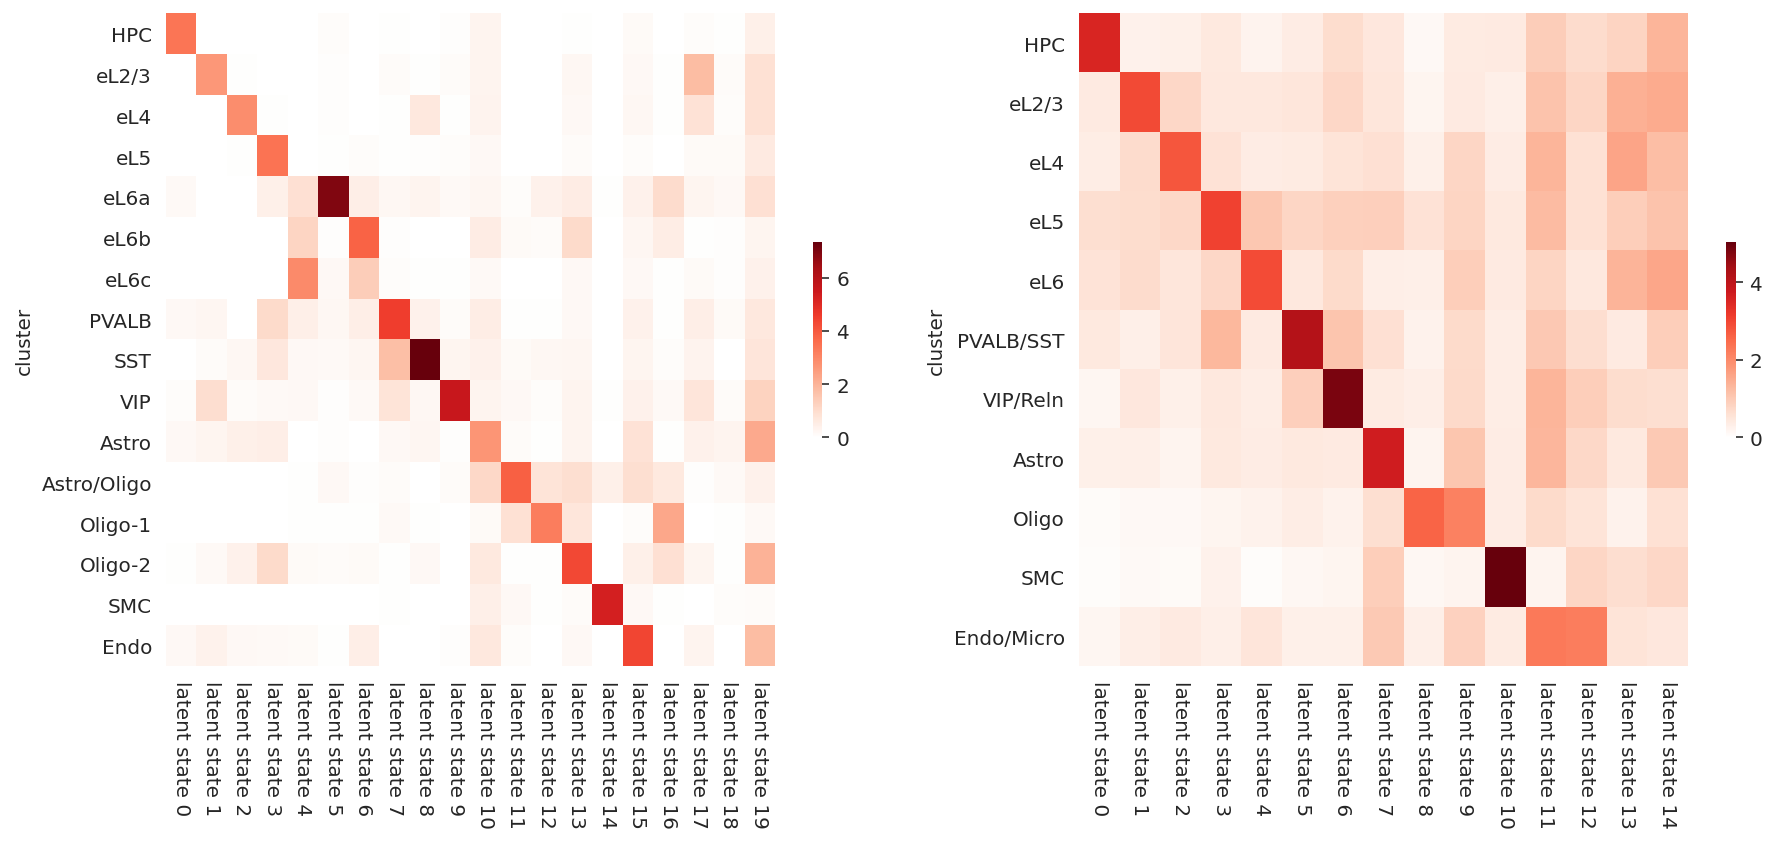

In [14]:
segmentdata = copy.deepcopy(plt.get_cmap('Reds')._segmentdata)
segmentdata['red'  ][0] = (0., 1., 1.)
segmentdata['green'][0] = (0., 1., 1.)
segmentdata['blue' ][0] = (0., 1., 1.)
cm = matplotlib.colors.LinearSegmentedColormap('', segmentdata=segmentdata, N=256)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
obj_SpiceMix.visualizeFeatureEnrichment(
    axes[0], cmap=cm, ignores_y=['NA'],
    normalizer_raw=StandardScaler(with_mean=False).fit_transform,
)
obj_NMF     .visualizeFeatureEnrichment(
    axes[1], cmap=cm,
    normalizer_raw=StandardScaler(with_mean=False).fit_transform,
)

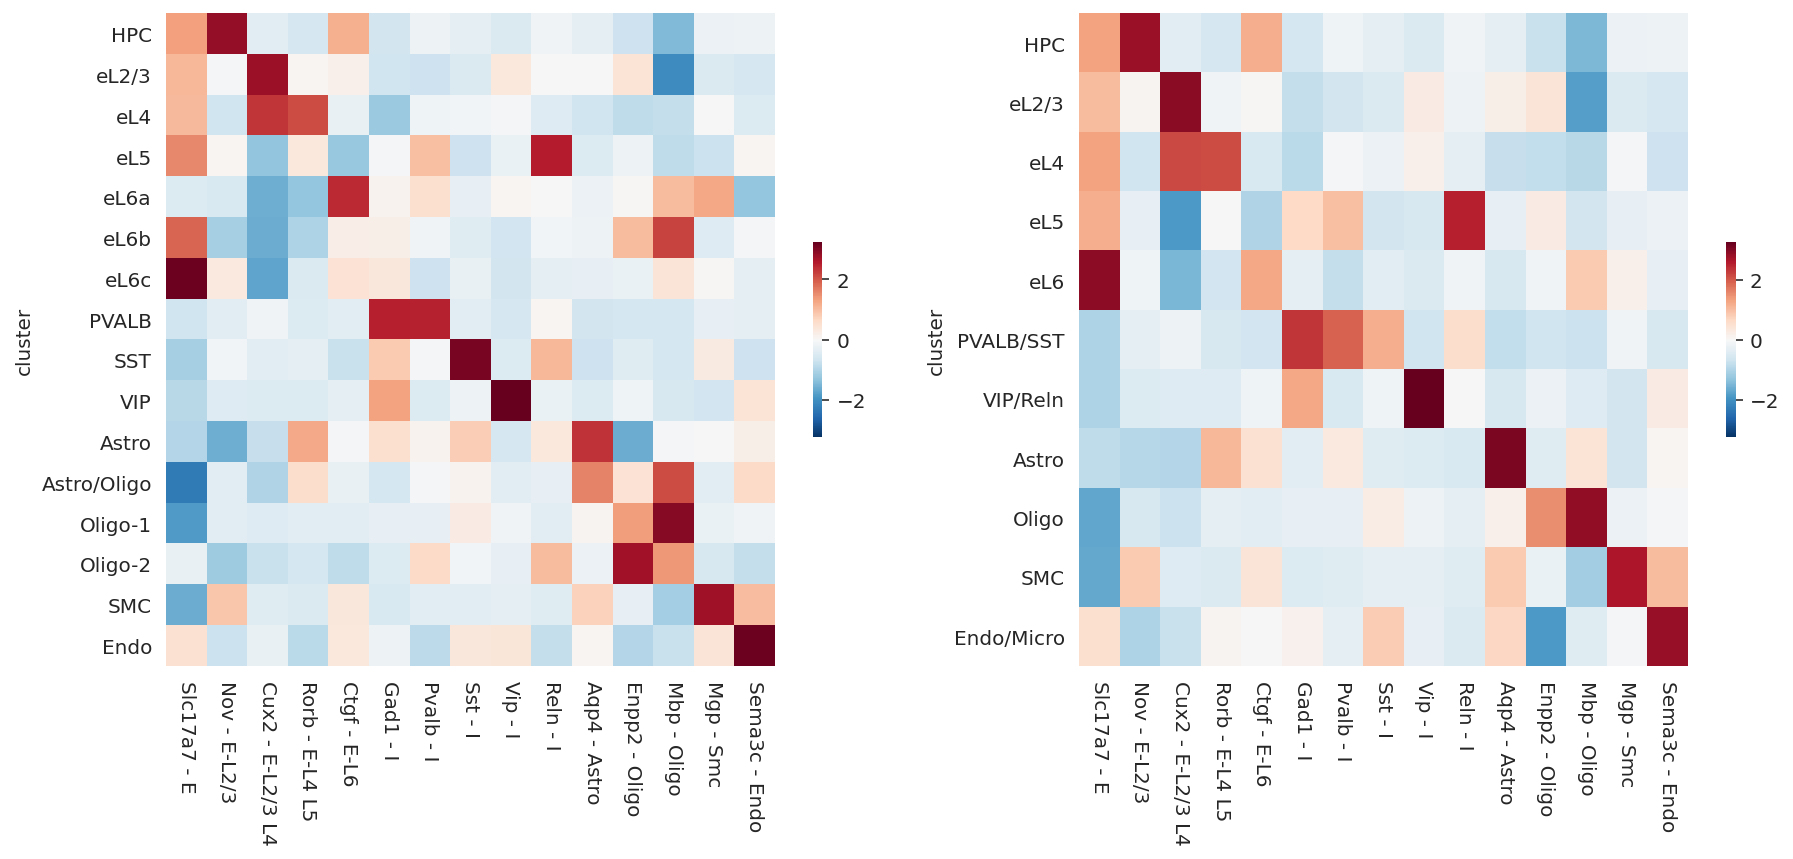

In [15]:
segmentdata = copy.deepcopy(plt.get_cmap('RdBu')._segmentdata)
for key in ['red', 'green', 'blue']:
    segmentdata[key] = [(1.-i, k, j) for (i, j, k) in segmentdata[key][::-1]]
cm = matplotlib.colors.LinearSegmentedColormap('', segmentdata=segmentdata, N=256)
kwargs=dict(
    cmap=cm,
)

# In the first column are the gene IDs, and in the second column are annotations, 
#   which are cell types in this example
gene_list_plot = np.array([
    ('Slc17a7',	'E'), # putative marker of all excitatory neural types
    ('Nov',		'E-L2/3'), # STARmap, Fig. 2J
    ('Cux2',	'E-L2/3 L4'), # STARmap, Fig. 2J
    ('Rorb',	'E-L4 L5'), # STARmap, Fig. 2J
    ('Ctgf',	'E-L6'), # STARmap, Fig. 2J & tasic
    
    ('Gad1',	'I'), # putative marker of all inhibitory neural types
    ('Pvalb',	'I'), # putative marker of PVALB subtype
    ('Sst',		'I'), # putative marker of SST subtype
    ('Vip',		'I'), # putative marker of VIP subtype
    ('Reln',	'I'),
    
    ('Aqp4',	'Astro'), # tasic
    ('Enpp2',	'Oligo'), # STARmap Fig. S6B
    ('Mbp',		'Oligo'), # tasic
    ('Mgp',		'Smc'), # STARmap Fig. S6B
    ('Sema3c',	'Endo'), # STARmap Fig. S6B
])
# Extract gene IDs and prepend string 'expr '
keys_x = [f'expr {_[0]}' for _ in gene_list_plot]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
obj_SpiceMix.visualizeFeatureEnrichment(
    axes[0], keys_x=keys_x, **kwargs, ignores_y=['NA'],
    normalizer_raw=StandardScaler().fit_transform,
    normalizer_avg=lambda x: StandardScaler().fit_transform(x.T).T,
)
obj_NMF     .visualizeFeatureEnrichment(
    axes[1], keys_x=keys_x, **kwargs,
    normalizer_raw=StandardScaler().fit_transform,
    normalizer_avg=lambda x: StandardScaler().fit_transform(x.T).T,
)
for ax in axes:
    ax.set_xticklabels(' - '.join(_) for _ in gene_list_plot)

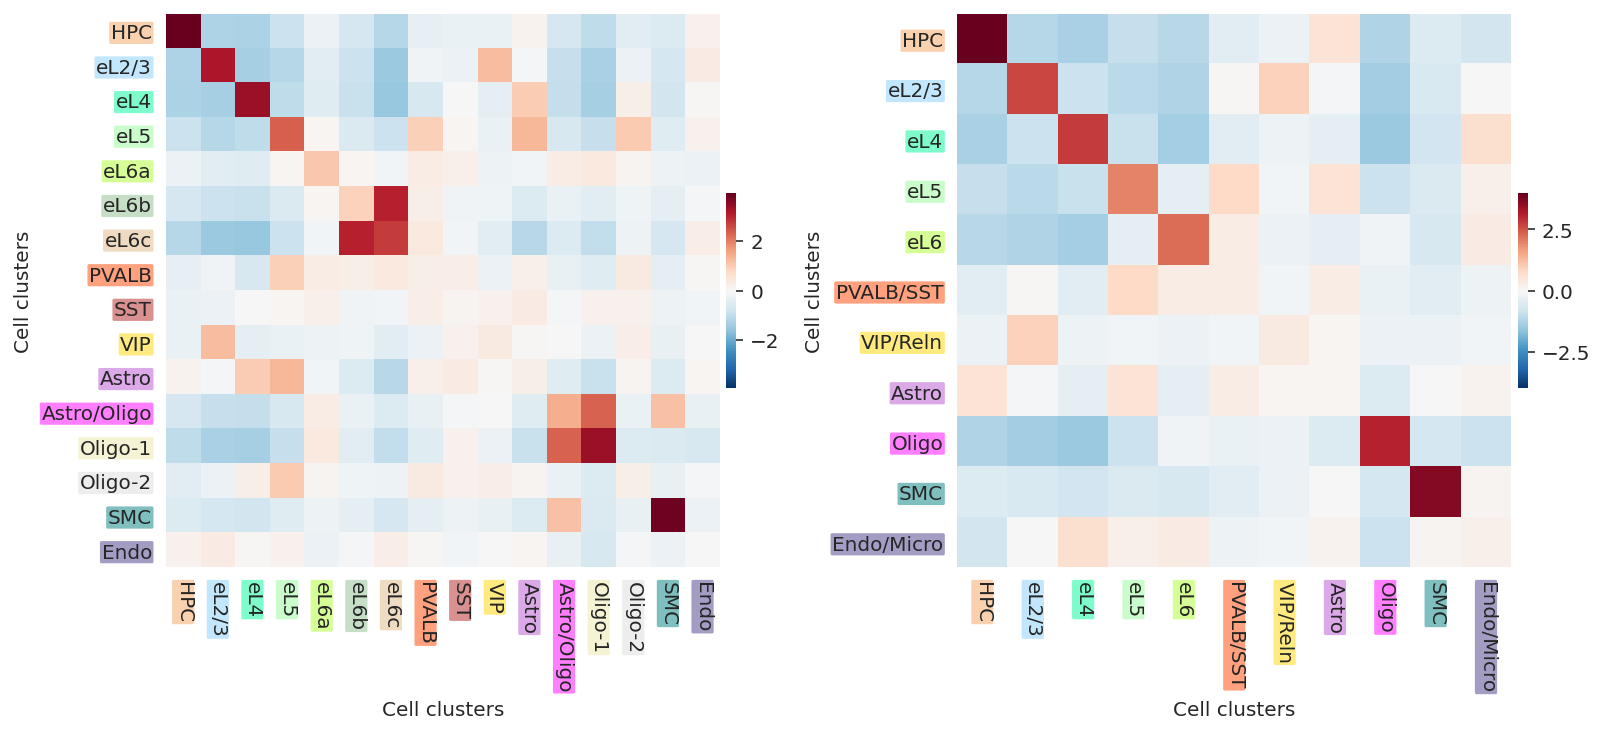

In [16]:
# plot the empirical affinity between cell types
segmentdata = copy.deepcopy(plt.get_cmap('RdBu')._segmentdata)
for channel in ['red', 'green', 'blue']:
    segmentdata[channel] = [(1.-i, k, j) for (i, j, k) in segmentdata[channel][::-1]]
cm = matplotlib.colors.LinearSegmentedColormap('', segmentdata=segmentdata, N=256)
kwargs = dict(
    cmap=cm,
)
fig, axes = plt.subplots(1, 2, figsize=(13, 6))
obj_SpiceMix.plotAffinityClusters(axes[0], ignores={'NA'}, **kwargs)
obj_NMF     .plotAffinityClusters(axes[1], ignores={'NA'}, **kwargs)

Iteration 200
Iteration 200


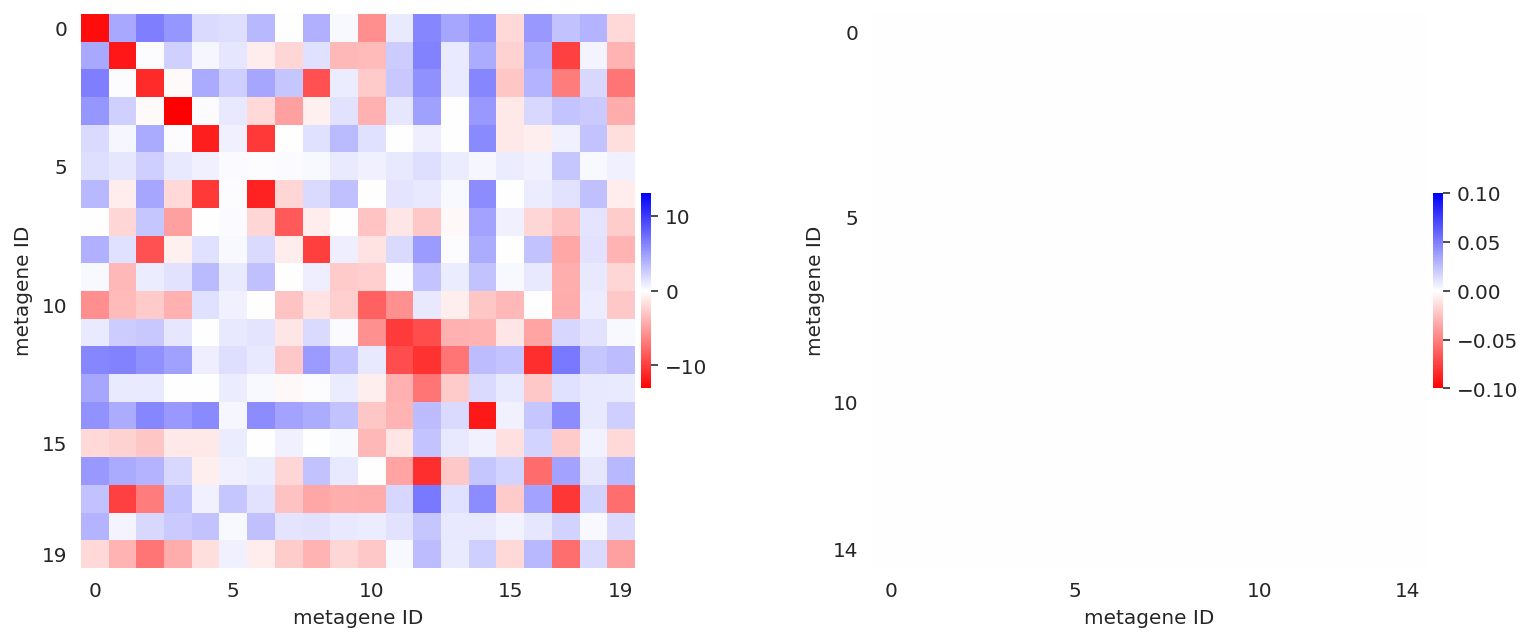

In [17]:
segmentdata = copy.deepcopy(plt.get_cmap('bwr')._segmentdata)
for key in ['red', 'green', 'blue']:
    segmentdata[key] = [(1.-i, k, j) for (i, j, k) in segmentdata[key][::-1]]
cm = matplotlib.colors.LinearSegmentedColormap('', segmentdata=segmentdata, N=256)
kwargs = dict(
    cmap=cm,
)

fig, axes = plt.subplots(1, 2, figsize=(13, 6))
obj_SpiceMix.plotAffinityMetagenes(axes[0], iteration=-1, **kwargs)